In [ ]:
# Uncomment this session to install packages 
# install.packages('ggplot2')
# install.packages('gapminder')
# install.packages('gganimate')
# install.packages('gifski')
# install.packages('av')
# install.packages('Rcpp')

In [ ]:
library(ggplot2)
library(gganimate)
library(gridExtra)

In [112]:
# Data generation
set.seed(1)
n=200; # 50 balls 
r=5; # 5 factor levels (colors)
radius.mean=2*(2:(r+1)); 
# radius.mean=rep(3,r);  # What if we set the mean to be the same?


X=sample(1:r,size=n,replace=TRUE) # factor levels, random samples
Y=radius.mean[X]+rnorm(n,sd=0.9); # response Y


In [113]:
round(Y,digits=2)

[1] 1.75 4.68 3.38 2.79 3.95 3.80 2.44 4.99 2.77 1.72 2.87 3.19 5.08 3.10 3.41
 [16] 2.93 2.70 2.97 3.71 4.87 3.92 4.09 1.89 3.89 3.20 1.68 3.47 2.86 4.32 2.31
 [31] 2.61 2.17 2.84 3.36 2.34 3.75 1.91 2.06 4.30 2.09 3.37 2.66 3.37 4.52 4.43
 [46] 2.70 0.94 5.25 3.60 3.49 2.99 3.46 2.85 3.38 2.64 1.77 3.89 4.37 2.72 1.87
 [61] 3.58 2.96 1.44 3.00 2.43 2.69 1.96 4.62 2.70 1.56 3.18 3.24 2.11 0.40 2.42
 [76] 3.51 2.95 2.91 3.50 1.93 3.99 3.00 3.64 3.93 3.20 2.21 4.05 1.20 2.51 2.77
 [91] 2.85 3.92 3.12 3.37 2.94 2.78 3.63 4.03 0.84 3.52 3.34 2.62 3.86 2.65 2.74
[106] 3.77 4.55 3.24 2.62 1.93 2.70 2.15 2.77 3.35 2.23 5.38 3.14 4.02 0.94 3.67
[121] 1.82 3.83 3.36 2.63 4.19 2.37 2.48 2.10 2.40 3.85 3.39 3.90 2.65 3.34 3.22
[136] 1.72 4.60 3.12 3.69 3.86 2.95 2.72 3.80 2.06 4.77 2.65 4.49 4.36 3.07 3.51
[151] 2.08 3.29 3.94 3.09 2.59 2.41 2.97 3.96 2.56 2.89 1.84 3.44 4.18 4.35 3.73
[166] 1.32 3.43 3.41 2.68 3.15 2.22 3.61 2.71 1.59 2.67 4.23 2.70 3.66 3.85 3.00
[181] 2.68 2.52 3.67 2.04 3.22 2.74 0.96 1.73 3.82 2.83 3.72 4.70 4.33 3.61 3.34
[196] 2.83 4.42 3.54 1.94 2.86

In [114]:
# Parameters for visualizations
T = 10; # frame number for animation
xyrange=6;
# x and y coordinates

coords.x=matrix(0,nrow=n,ncol=T);
coords.y=matrix(0,nrow=n,ncol=T)
coords.x[,1]= xyrange*runif(n);
coords.y[,1]= xyrange*runif(n);

coords.x[,T]= X + 0.8*(runif(n)-0.5);
coords.y[,T]= coords.y[,1]

for(i in 1:n){
    coords.x[i,]=seq(from=coords.x[i,1],to=coords.x[i,T],length.out=T)
    coords.y[i,]=seq(from=coords.y[i,1],to=coords.y[i,T],length.out=T)
}


In [115]:

# Wrap these into a data.frame (in order to use ggplot2)

example.ANOVA<-data.frame(
    X=X,
    Y=Y,
    coords.x=coords.x[,1],
    coords.y=coords.y[,1],
    ID= 1:n,
    t= rep(1,n)
)

for(l in 2:T){

    
tmp.ANOVA<-data.frame(
    X=X,
    Y=Y,
    coords.x=coords.x[,l],
    coords.y=coords.y[,l],
    ID= 1:n,
    t= rep(l,n)
)
example.ANOVA<-rbind(example.ANOVA,tmp.ANOVA)
    
}

# add a few more frames at the end:
for(l in (T+1):(T+6)){
    
tmp.ANOVA<-data.frame(
    X=X,
    Y=Y,
    coords.x=coords.x[,T],
    coords.y=coords.y[,T],
    ID= 1:n,
    t= rep(l,n)
)
example.ANOVA<-rbind(example.ANOVA,tmp.ANOVA)
    
}


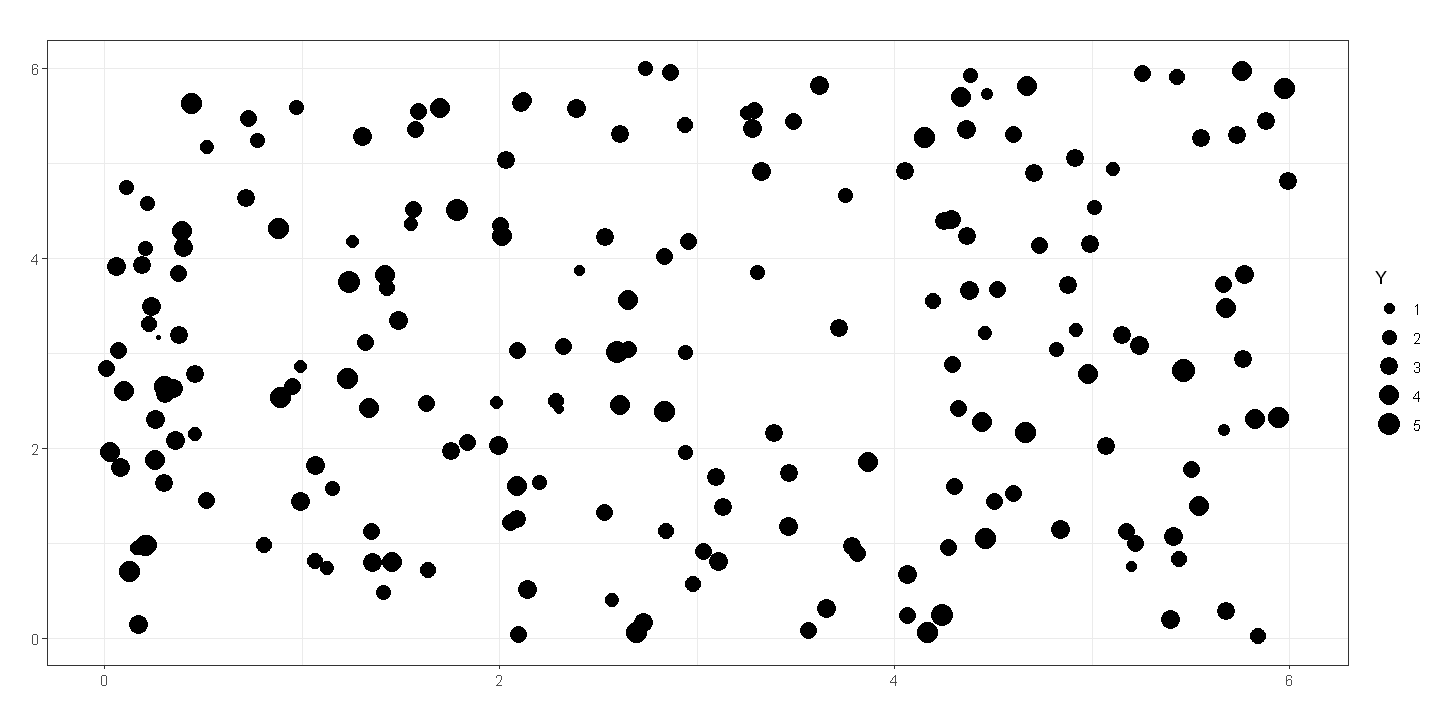

In [116]:
# Visualize the data

tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = '', x = '', y = '') +
  theme_bw() 
  

In [117]:
# variance estimate:

var.all=var(Y) 
ssto= sum((Y-mean(Y))^2)

var.all - ssto/(n-1)

[1] 1.110223e-16

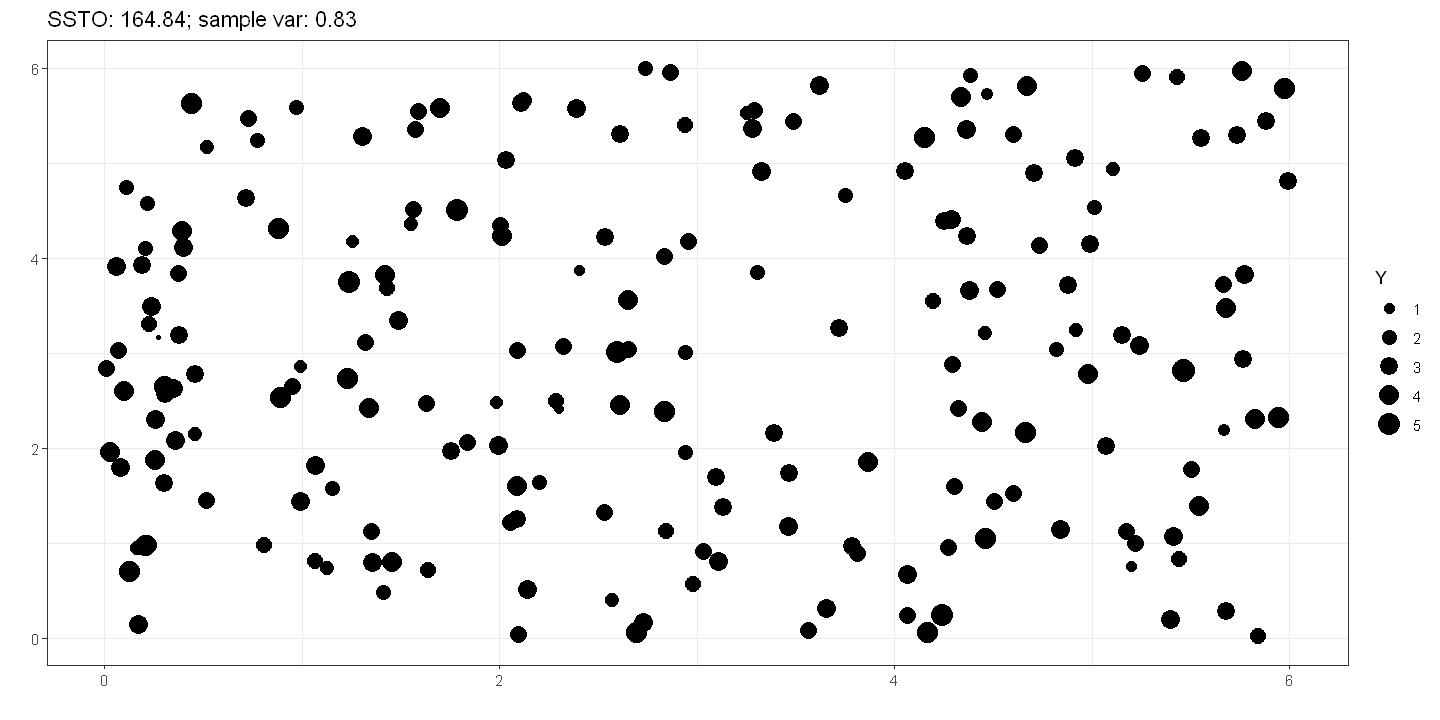

In [118]:
# Visualize the data with variance estimate:
tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = paste('SSTO: ', round(ssto,2), '; sample var: ', round(var.all,2),sep='') , x = '', y = '') +
  theme_bw() 
 

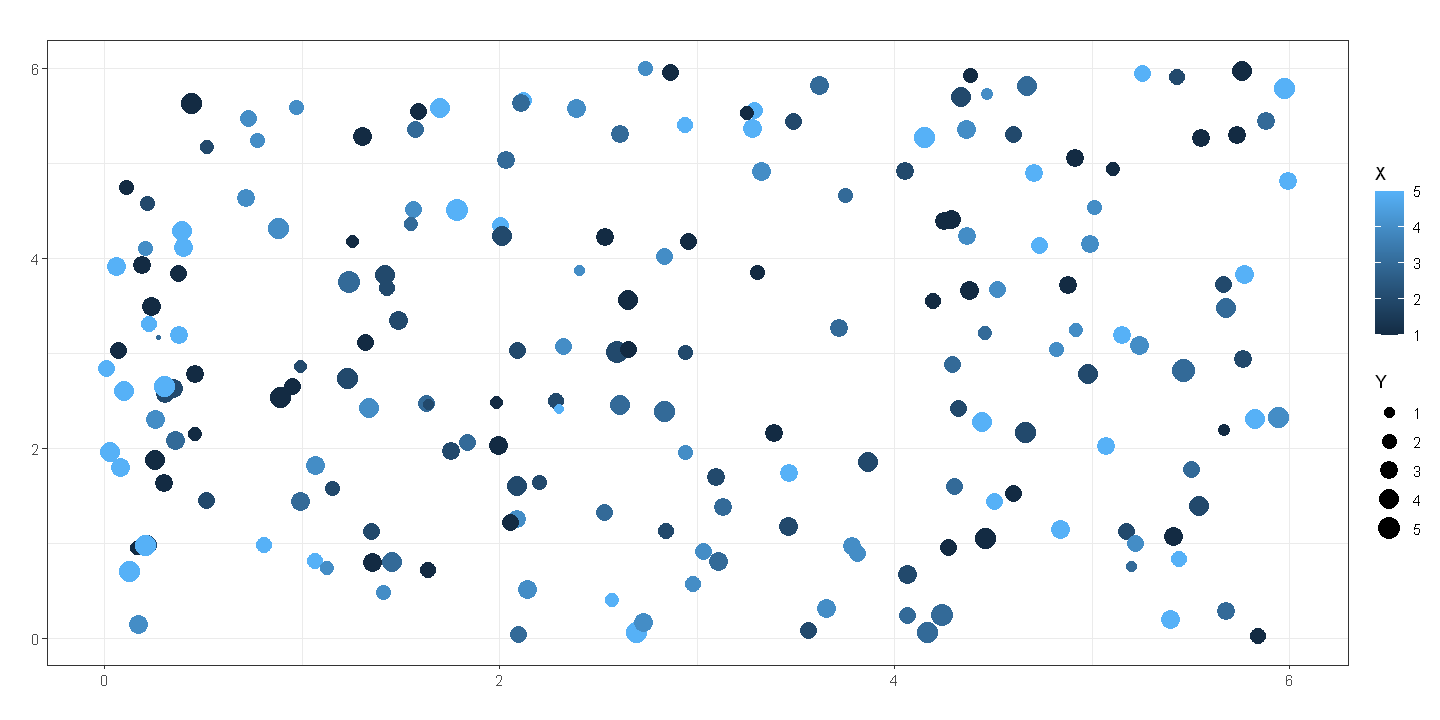

In [119]:
# Visualize the data with colors by X

tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.x, coords.y, size = Y,color=X)) +
  geom_point() +
  labs(title = '', x = '', y = '') +
  theme_bw() 
  

In [70]:

# Animation

options(repr.plot.width=8, repr.plot.height=8)
ggplot(example.ANOVA, aes(coords.x, coords.y, size = Y, color = X)) +
  geom_point() +
  theme_bw() +
  # gganimate specific bits:
  labs(title = '', x = '', y = '') +
  transition_time(t) +
  ease_aes('linear')

anim_save("anova-movement.gif")


Rendering [--------------------------------------------] at 4.9 fps ~ eta: 20s

Rendering [>-------------------------------------------] at 5.1 fps ~ eta: 19s

Rendering [>-------------------------------------------] at 4.1 fps ~ eta: 23s

Rendering [=>------------------------------------------] at 4.5 fps ~ eta: 22s

Rendering [=>------------------------------------------] at 4.6 fps ~ eta: 21s

Rendering [==>-----------------------------------------] at 4.6 fps ~ eta: 20s

Rendering [===>----------------------------------------] at 4.8 fps ~ eta: 19s

Rendering [====>-----------------------------------------] at 5 fps ~ eta: 18s

Rendering [=====>----------------------------------------] at 5 fps ~ eta: 18s

Rendering [=====>--------------------------------------] at 5.1 fps ~ eta: 17s

Rendering [======>-------------------------------------] at 5.1 fps ~ eta: 17s

Rendering [======>-------------------------------------] at 5.1 fps ~ eta: 16s

Rendering [=======>--------------------

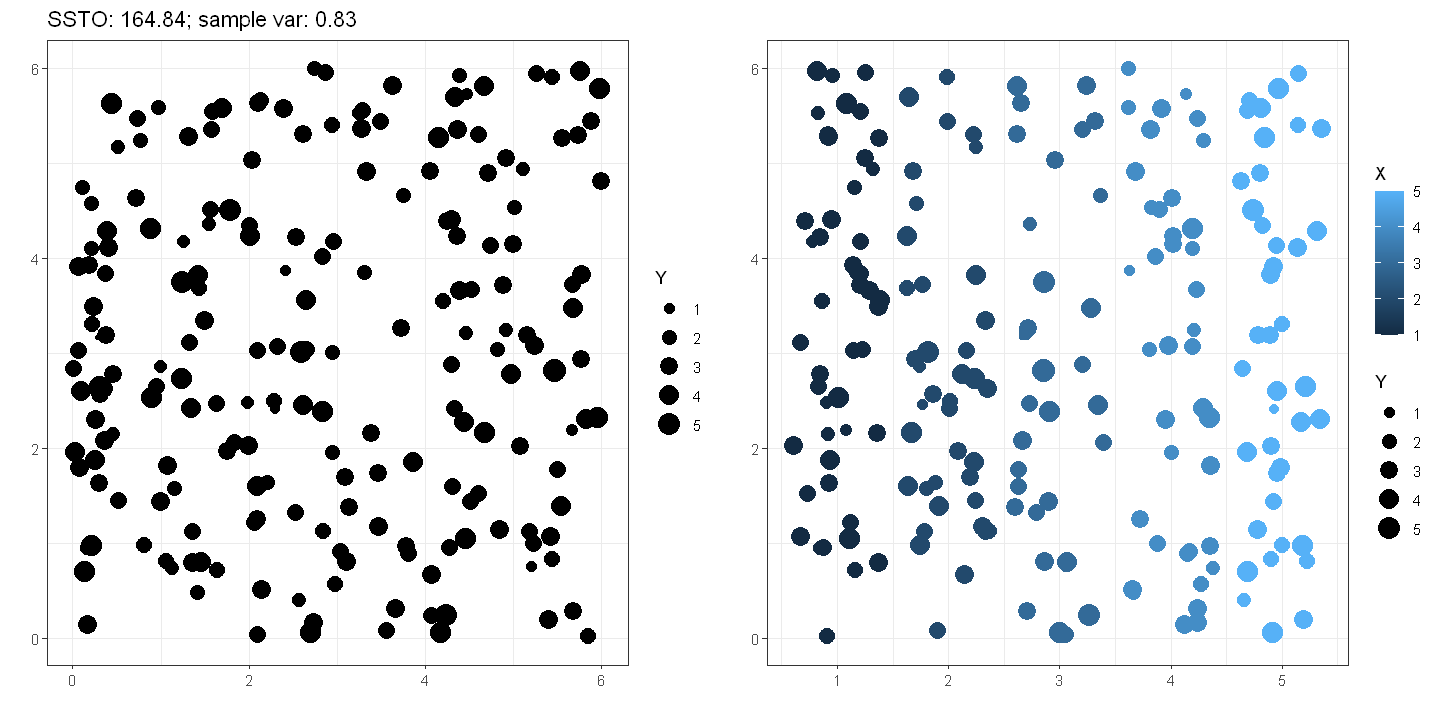

In [120]:
###### Visualize the data side by side 



options(repr.plot.width=12, repr.plot.height=6)
tmp1.data<-example.ANOVA[example.ANOVA$t==1,]
plot1<-ggplot(tmp1.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = paste('SSTO: ', round(ssto,2), '; sample var: ', round(var.all,2),sep='') , x = '', y = '') +
  theme_bw() 
  

tmpT.data<-example.ANOVA[example.ANOVA$t==T,]
plotT=ggplot(tmpT.data, aes(coords.x, coords.y, size = Y,color=X)) +
  geom_point() +
  labs(title = '', x = '', y = '') +
  theme_bw() 
  


grid.arrange(plot1, plotT, ncol=2)

In [121]:
# Calculate the residual sum of squares and variance of the error terms

anova.fit=aov(Y~X)
anova.table=summary(anova.fit)

sse=anova.table[[1]][2,2]
mse=anova.table[[1]][2,3]
df.mse=n-2;
mse-sse/df.mse

[1] 0

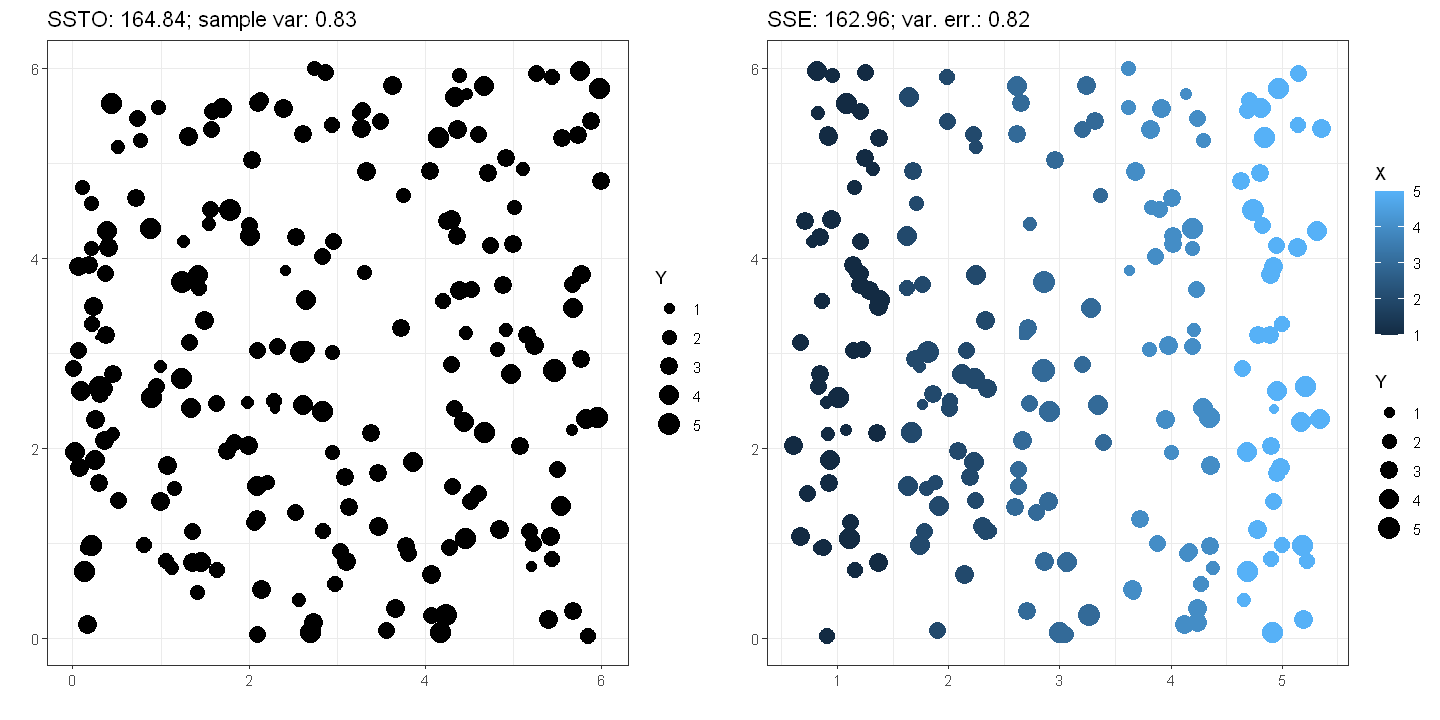

In [122]:
###### Visualize the data side by side 



options(repr.plot.width=12, repr.plot.height=6)
tmp1.data<-example.ANOVA[example.ANOVA$t==1,]
plot1<-ggplot(tmp1.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = paste('SSTO: ', round(ssto,2), '; sample var: ', round(var.all,2),sep='') , x = '', y = '') +
  theme_bw() 
  

tmpT.data<-example.ANOVA[example.ANOVA$t==T,]
plotT=ggplot(tmpT.data, aes(coords.x, coords.y, size = Y,color=X)) +
  geom_point() +
   labs(title = paste('SSE: ', round(sse,2), '; var. err.: ', round(mse,2),sep='') , x = '', y = '') +
  theme_bw() 
  


grid.arrange(plot1, plotT, ncol=2)